In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject


In [2]:
X, y= load_breast_cancer().data, load_breast_cancer().target.reshape(-1,1)

In [3]:
X.shape, y.shape

((569, 30), (569, 1))

In [26]:
class NN_Build(object):
    def __init__(self, eta = 0.005, iterations = 1000, epsilon = 0.01, dims = [X.shape[1],50,50,1]):
        self.eta = eta
        self.iterations =  iterations
        self.epsilon = epsilon
        self.dims = dims
        self.Layers = len(dims)
        
    def fit(self,X,y):
        m_ = len(y)
        y_ = y.T
        X_ = X.T
        A0 = X_
        cost_ =[]
        acc_ = []
        i = 1
        parameters = {}
        
        for l in range(1,self.Layers):
            parameters['W'+str(l)] = np.random.randn(self.dims[l],self.dims[l-1]) * self.epsilon
            parameters['b'+str(l)] = np.zeros((self.dims[l],1))
        
        while(i != self.iterations):
            #fwrd prp
            Z1 = np.dot(parameters['W1'],A0) + parameters['b1']
            A1 = self.sigmoid(Z1)
            Z2 = np.dot(parameters['W2'],A1) + parameters['b2']
            A2 = self.sigmoid(Z2)
            Z3 = np.dot(parameters['W3'],A2) + parameters['b3']
            A3 = self.sigmoid(Z3)
            #cost
            cost = self.cost(m_,A3,y_)
            cost_.append(cost)
            acc = self.acc(y_,np.where(A3>0.5,1,0),m_)
            acc_.append(acc)
            #derivatives
            dZ3 = A3 - y_
            dW3 = (1/m_) *np.dot(dZ3, A2.T)
            db3 = (1/m_) * np.sum(dZ3, axis= 1, keepdims= True)
            dZ2 = np.dot(parameters['W3'].T,dZ3) * (A2 * (1-A2))
            dW2 = (1/m_) *np.dot(dZ2, A1.T)
            db2 = (1/m_) * np.sum(dZ2, axis= 1, keepdims= True)
            dZ1 = np.dot(parameters['W2'].T,dZ2) * (A1 * (1-A1))
            dW1 = (1/m_) *np.dot(dZ1, A0.T)
            db1 = (1/m_) * np.sum(dZ1, axis= 1, keepdims= True)
            #backprog
            parameters['W3'] -= self.eta * dW3
            parameters['W2'] -= self.eta * dW2
            parameters['W1'] -= self.eta * dW1
            parameters['b3'] -= self.eta * db3
            parameters['b2'] -= self.eta * db2
            parameters['b1'] -= self.eta * db1   
            if i % 500 == 0:
                print(f'epoch:{i}::cost:{cost}::acc:{acc}')
            i += 1
        plt.figure(figsize = (16,7))
        history = pd.DataFrame(cost_, columns=['cost'])
        history['acc'] = acc_
        plt.subplot(1,2,1)
        plt.plot(history.acc)
        plt.ylim(0,1)
        plt.subplot(1,2,2)
        plt.plot(history.cost)
        plt.show()      
        
        return parameters
    
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self,m_,A3,y_):
        return -(1/m_) * np.sum( y_ * np.log(A3) + (1-y_) * np.log(1-A3))
    
    
    def acc(self,y_true,y_pred,m_):
        return np.sum(y_true == y_pred)/ m_

epoch:500::cost:0.6597918470616164::acc:0.6274165202108963
epoch:1000::cost:0.659293403763582::acc:0.6274165202108963
epoch:1500::cost:0.6585404723102198::acc:0.6274165202108963
epoch:2000::cost:0.6572886940623858::acc:0.6274165202108963
epoch:2500::cost:0.6552167579965781::acc:0.6274165202108963
epoch:3000::cost:0.6513818244819555::acc:0.6274165202108963
epoch:3500::cost:0.6437228895894879::acc:0.6274165202108963
epoch:4000::cost:0.6268349430021315::acc:0.6274165202108963
epoch:4500::cost:0.5886241610888003::acc:0.6274165202108963
epoch:5000::cost:0.5125349787896196::acc:0.6274165202108963
epoch:5500::cost:0.4051934789459924::acc:0.9209138840070299
epoch:6000::cost:0.35977012608731096::acc:0.8963093145869947
epoch:6500::cost:0.278997425851451::acc:0.9191564147627417
epoch:7000::cost:0.25521210381461573::acc:0.9173989455184535
epoch:7500::cost:0.23811347719735418::acc:0.9226713532513181
epoch:8000::cost:0.22769871867803795::acc:0.9226713532513181
epoch:8500::cost:0.21938124702183961::a

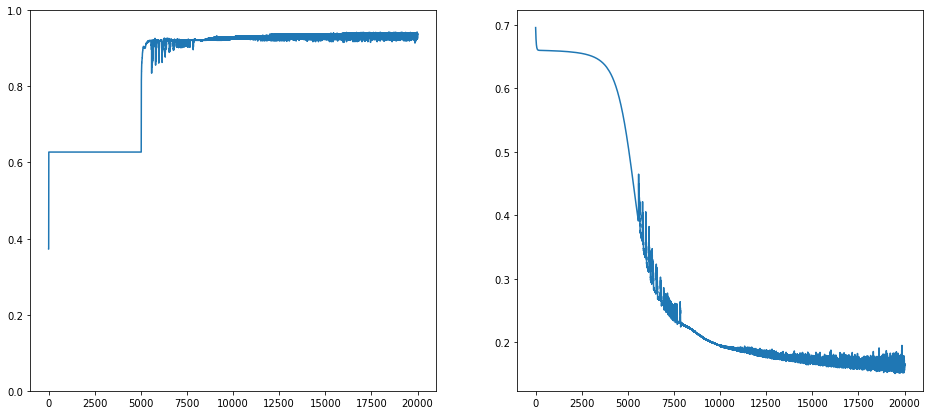

In [27]:
parameters = NN_Build(eta = 0.005, iterations= 20000, epsilon= 0.01).fit(X,y)